In [1]:
"""
Author: Andres Melendez
Date: [Insert Date]
Description: This script analyzes the correlation between earthquake magnitude and tsunami occurrence 
using a dataset filtered for the 'mb' magnitude type.
"""


"\nAuthor: Andres Melendez\nDate: [Insert Date]\nDescription: This script analyzes the correlation between earthquake magnitude and tsunami occurrence \nusing a dataset filtered for the 'mb' magnitude type.\n"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

def load_data(file_path):
    """
    Loads the earthquake data from the specified CSV file.

    Parameters:
    file_path (str): The path to the CSV file containing earthquake data.

    Returns:
    pd.DataFrame: A pandas DataFrame containing the loaded earthquake data.
    """
    return pd.read_csv(file_path)


In [3]:
def process_data(file_path):
    """
    Attempts to load and process the earthquake data.

    Parameters:
    file_path (str): The path to the data file.

    Returns:
    pd.DataFrame: Processed earthquake data or None if an error occurs.
    """
    try:
        # Attempt to load data
        data = load_data(file_path)
        return data
    except FileNotFoundError as e:
        # Handle file not found error
        print(f"Error: The file at {file_path} was not found. {e}")
    except pd.errors.EmptyDataError as e:
        # Handle empty data file
        print(f"Error: The file is empty. {e}")
    finally:
        print("Data processing attempt completed.")


In [4]:
def analyze_correlation(data):
    """
    Analyzes the correlation between earthquake magnitude and tsunami occurrence
    for earthquakes measured with 'mb' magnitude type.

    Parameters:
    data (pd.DataFrame): Filtered earthquake data containing only 'mb' magnitude type.

    Returns:
    pd.DataFrame: Correlation matrix of the selected columns (magnitude and tsunami).
    """
    # Filter data for 'mb' magnitude type and drop rows with missing values
    mb_data = data[data['magType'] == 'mb'][['mag', 'tsunami']].dropna()

    # Compute correlation matrix between magnitude and tsunami occurrence
    correlation_matrix = mb_data.corr()
    
    return correlation_matrix


In [5]:
def plot_heatmap(correlation_matrix):
    """
    Creates a heatmap to visualize the correlation matrix between earthquake magnitude
    and tsunami presence.

    Parameters:
    correlation_matrix (pd.DataFrame): Correlation matrix to visualize.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Coefficients between Earthquake Magnitude and Tsunami Presence (mb magnitude type)')
    plt.show()


Data processing attempt completed.


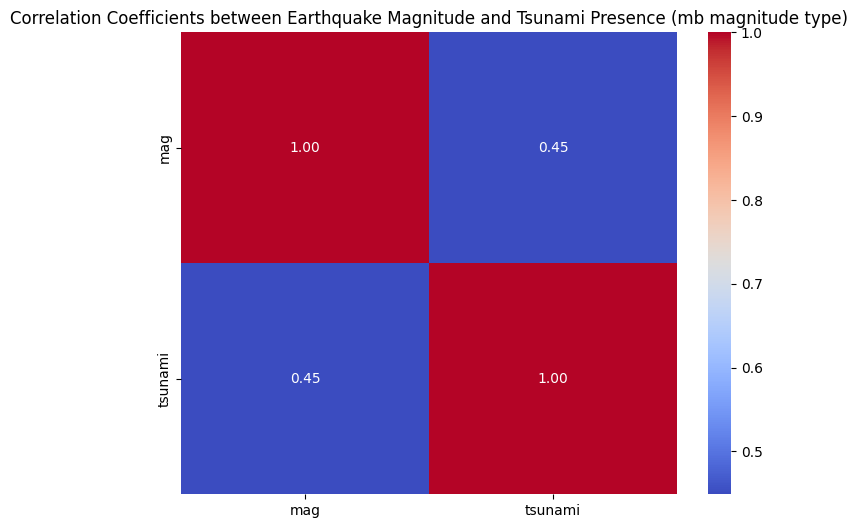

In [6]:
# Main script execution
file_path = '../data/Mod8/earthquakes.csv'

# Load and process the earthquake data
earthquake_data = process_data(file_path)

# Analyze correlation if data is successfully loaded
if earthquake_data is not None:
    correlation_matrix = analyze_correlation(earthquake_data)

    # Plot heatmap for the correlation matrix
    plot_heatmap(correlation_matrix)


In [7]:
# Description: This script creates box plots for Facebook's traded volume and closing prices in 2018.
# It also calculates and draws reference lines for Tukey's fences using a multiplier of 1.5.

def calculate_tukey_bounds(series):
    """
    Calculates the Tukey fence bounds for a given series using a multiplier of 1.5.

    Parameters:
    series (pd.Series): A pandas Series for which to calculate the Tukey bounds.

    Returns:
    tuple: A tuple containing the lower and upper bounds.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound


In [8]:
def create_boxplot_with_tukey(data, column, ax, title):
    """
    Creates a box plot for the specified data column and draws reference lines for the Tukey fence bounds.

    Parameters:
    data (pd.DataFrame): The dataset containing the stock data.
    column (str): The column name for which to generate the box plot.
    ax (matplotlib.axes.Axes): The axes on which to draw the box plot.
    title (str): The title of the plot.
    """
    lower_bound, upper_bound = calculate_tukey_bounds(data[column])
    
    sns.boxplot(data=data[column], ax=ax)
    ax.set_title(title)
    ax.axhline(lower_bound, color='r', linestyle='--', label='Lower Tukey Bound')
    ax.axhline(upper_bound, color='g', linestyle='--', label='Upper Tukey Bound')
    ax.legend()


In [9]:
def main(file_path):
    """
    Main function to load data, calculate Tukey bounds, and create box plots for volume traded and closing prices.

    Parameters:
    file_path (str): The path to the CSV file containing Facebook stock prices.
    """
    try:
        # Load data
        stock_data = load_data(file_path)
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Create box plot for volume traded
        create_boxplot_with_tukey(stock_data, 'volume', ax1, 'Facebook Volume Traded')

        # Create box plot for closing prices
        create_boxplot_with_tukey(stock_data, 'close', ax2, 'Facebook Closing Prices')

        # Adjust layout and display the plots
        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: The file at {file_path} was not found. {e}")
    finally:
        print("Stock data analysis completed.")


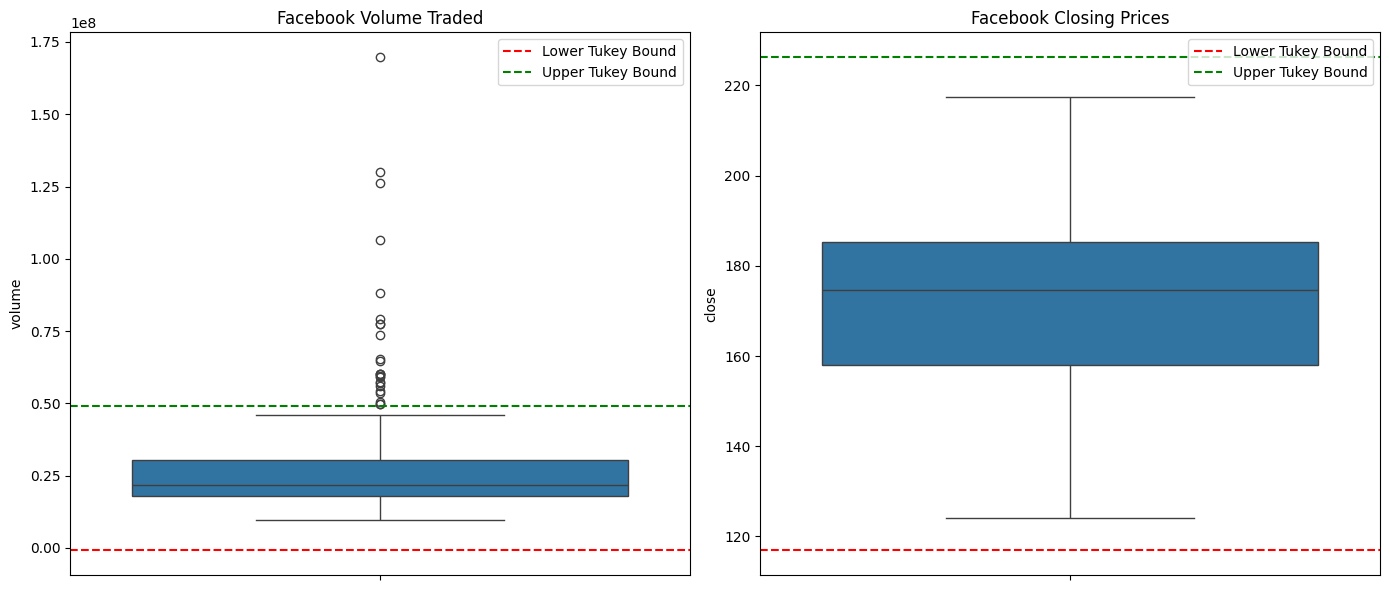

Stock data analysis completed.


In [10]:
# Main script execution
file_path = '../data/Mod8/fb_stock_prices_2018.csv'
main(file_path)

In [11]:
# Description: This script plots the evolution of cumulative COVID-19 cases worldwide.
# It adds a vertical line marking the date when cases surpassed 1 million.

def format_y_axis(value, tick_number):
    """
    Formats the y-axis labels to include commas for better readability.

    Parameters:
    value (float): The y-axis value to format.
    tick_number (int): The position of the tick (not used here).

    Returns:
    str: Formatted y-axis label with commas.
    """
    return f'{int(value):,}'


In [12]:
def plot_cumulative_cases(data, date_column, cases_column):
    """
    Plots the cumulative COVID-19 cases over time and adds a vertical dashed line
    when cases surpassed 1 million.

    Parameters:
    data (pd.DataFrame): The dataset containing cumulative cases and dates.
    date_column (str): The column name for the date information.
    cases_column (str): The column name for cumulative case counts.
    """
    # Find the date when cumulative cases surpassed 1 million
    million_cases_date = data[data[cases_column] >= 1_000_000][date_column].iloc[0]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(data[date_column], data[cases_column], label='Cumulative Cases')
    
    # Add a vertical dashed line at the point where cases surpassed 1 million
    plt.axvline(million_cases_date, color='r', linestyle='--', label=f'1M cases: {million_cases_date}')
    
    # Format the y-axis with commas
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))
    
    # Set plot labels and title
    plt.title('Cumulative COVID-19 Cases Worldwide')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Cases')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [13]:
def main(file_path):
    """
    Main function to load data, find the date when cases surpassed 1 million, and plot the cumulative cases.

    Parameters:
    file_path (str): The path to the CSV file containing COVID-19 case data.
    """
    try:
        # Load data
        covid_data = load_data(file_path)

        # Sort by date and calculate cumulative cases globally
        covid_data['dateRep'] = pd.to_datetime(covid_data['dateRep'], format='%d/%m/%Y')
        covid_data = covid_data.sort_values('dateRep')
        
        # Group data by date and calculate cumulative sum of cases
        worldwide_data = covid_data.groupby('dateRep').agg({'cases': 'sum'}).cumsum().reset_index()
        worldwide_data.columns = ['date', 'cumulative_cases']

        # Plot cumulative cases
        plot_cumulative_cases(worldwide_data, 'date', 'cumulative_cases')
    
    except FileNotFoundError as e:
        print(f"Error: The file at {file_path} was not found. {e}")
    finally:
        print("COVID-19 cases analysis completed.")


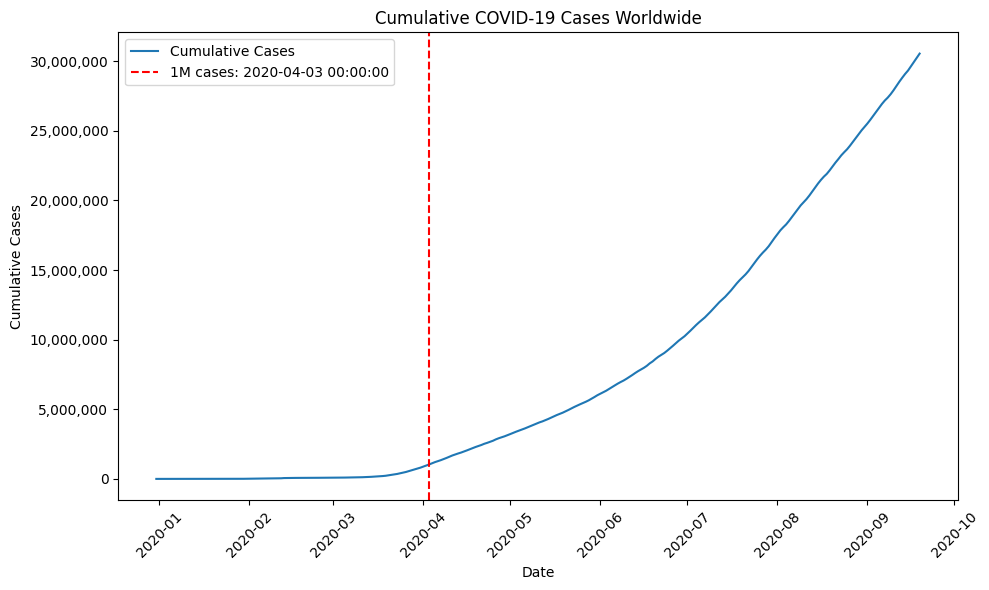

COVID-19 cases analysis completed.


In [14]:
# Main script execution
file_path = '../data/Mod8/covid19_cases.csv'
main(file_path)

In [15]:
# Description: This script plots Facebook's closing price and shades a rectangle marking the large decline
# from '2018-07-25' to '2018-07-31'.

def plot_closing_price(data, date_column, close_column):
    """
    Plots the Facebook closing price over time and shades a rectangle
    for the date range '2018-07-25' to '2018-07-31' indicating a large decline.

    Parameters:
    data (pd.DataFrame): The dataset containing stock closing prices and dates.
    date_column (str): The column name for the date information.
    close_column (str): The column name for the closing price information.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot the closing prices
    plt.plot(data[date_column], data[close_column], label='Closing Price')
    
    # Shade the area of the large decline (2018-07-25 to 2018-07-31)
    plt.axvspan('2018-07-25', '2018-07-31', color='red', alpha=0.3, label='Price Drop (July 25-31, 2018)')
    
    # Set plot labels and title
    plt.title('Facebook Closing Prices (2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [16]:
def main(file_path):
    """
    Main function to load data, plot the closing price, and shade the large decline area.

    Parameters:
    file_path (str): The path to the CSV file containing Facebook stock prices.
    """
    try:
        # Load data
        stock_data = load_data(file_path)

        # Convert the 'date' column to datetime format
        stock_data['date'] = pd.to_datetime(stock_data['date'])

        # Plot the closing price and shade the specified area
        plot_closing_price(stock_data, 'date', 'close')

    except FileNotFoundError as e:
        print(f"Error: The file at {file_path} was not found. {e}")
    finally:
        print("Stock price analysis completed.")


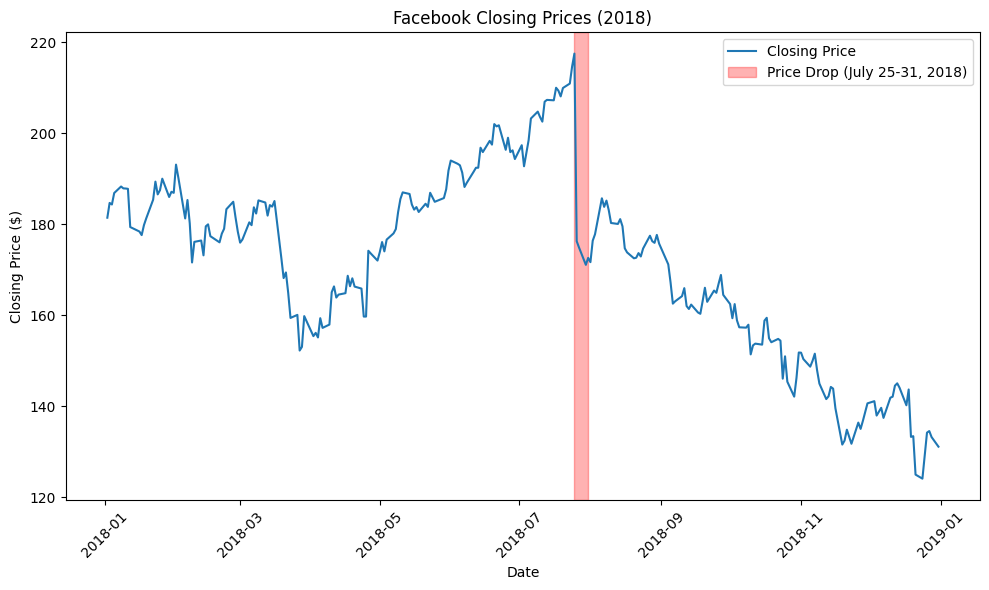

Stock price analysis completed.


In [17]:
# Main script execution
file_path = '../data/Mod8/fb_stock_prices_2018.csv'
main(file_path)

In [18]:
# Description: This script plots Facebook's closing price and annotates three major events in 2018:
#     a) Disappointing user growth announced after close on July 25, 2018.
#     b) Cambridge Analytica story breaks on March 19, 2018.
#     c) FTC launches investigation on March 20, 2018.

def annotate_event(data, date_column, close_column, annotation_dates, annotation_texts):
    """
    Plots the Facebook closing price and annotates specified events on the line plot.

    Parameters:
    data (pd.DataFrame): The dataset containing stock closing prices and dates.
    date_column (str): The column name for the date information.
    close_column (str): The column name for the closing price information.
    annotation_dates (list of str): A list of dates of the events to annotate.
    annotation_texts (list of str): A list of annotation texts corresponding to each event.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot the closing prices
    plt.plot(data[date_column], data[close_column], label='Closing Price')
    
    # Annotate each event
    for annotation_date, annotation_text in zip(annotation_dates, annotation_texts):
        event_price = data.loc[data[date_column] == annotation_date, close_column].values[0]
        plt.annotate(annotation_text, xy=(annotation_date, event_price), xytext=(annotation_date, event_price + 20),
                     arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="yellow"))
    
    # Set plot labels and title
    plt.title('Facebook Closing Prices (2018) with Event Annotations')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [19]:
def main(file_path):
    """
    Main function to load data, plot the closing price, and annotate the specified events.

    Parameters:
    file_path (str): The path to the CSV file containing Facebook stock prices.
    """
    try:
        # Load data
        stock_data = load_data(file_path)

        # Convert the 'date' column to datetime format
        stock_data['date'] = pd.to_datetime(stock_data['date'])

        # Dates of the events
        event_dates = [pd.to_datetime('2018-07-25'), pd.to_datetime('2018-03-19'), pd.to_datetime('2018-03-20')]
        
        # Corresponding event annotations
        event_annotations = [
            'Disappointing user growth\nJuly 25, 2018',
            'Cambridge Analytica story breaks\nMarch 19, 2018',
            'FTC launches investigation\nMarch 20, 2018'
        ]

        # Annotate the three events on the plot
        annotate_event(stock_data, 'date', 'close', event_dates, event_annotations)

    except FileNotFoundError as e:
        print(f"Error: The file at {file_path} was not found. {e}")
    finally:
        print("Stock price event annotation completed.")


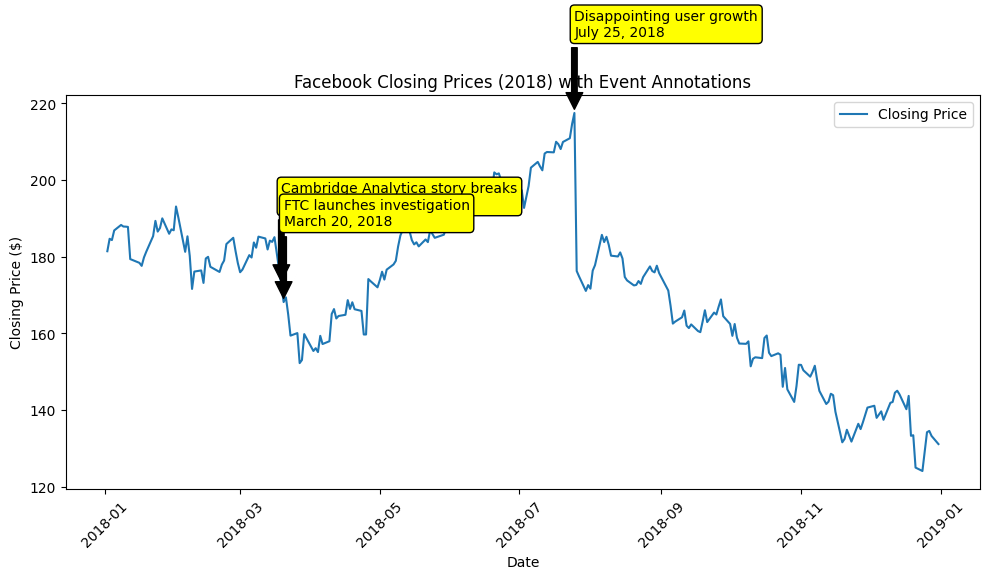

Stock price event annotation completed.


In [20]:
# Main script execution
file_path = '../data/Mod8/fb_stock_prices_2018.csv'
main(file_path)


In [26]:
# Description: This script modifies the reg_resid_plots() function to use a qualitative colormap from matplotlib
# instead of cycling between two colors.

def load_data():
    """
    Dummy function to simulate loading of data. Replace this with actual data loading logic.
    
    Returns:
    np.array: Feature matrix X.
    np.array: Target variable y.
    list: List of feature names.
    """
    # Simulated data (replace with actual data loading)
    X = np.random.rand(100, 3)
    y = 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.normal(0, 0.2, 100)
    feature_names = ['Feature1', 'Feature2', 'Feature3']
    
    return X, y, feature_names


In [27]:
def reg_resid_plots(X, y, feature_names):
    """
    Plots regression residuals for each feature in the dataset using a colormap for differentiation.

    Parameters:
    X (np.array or pd.DataFrame): Feature data.
    y (np.array or pd.Series): Target variable.
    feature_names (list of str): List of feature names corresponding to X.
    """
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, y)
    
    # Get predicted values and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    # Set up the plot
    num_features = X.shape[1]
    fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features))

    # Use a qualitative colormap (Set1)
    cmap = plt.get_cmap('Set1', num_features)
    
    # Loop through each feature and plot residuals
    for i in range(num_features):
        feature_data = X[:, i] if isinstance(X, np.ndarray) else X.iloc[:, i]
        
        # Assign colormap color
        color = cmap(i)
        
        # Plot residuals for the i-th feature
        axes[i].scatter(feature_data, residuals, color=color, edgecolor='k')
        axes[i].axhline(y=0, color='gray', linestyle='--', linewidth=1)
        axes[i].set_title(f'Residual Plot for {feature_names[i]}')
        axes[i].set_xlabel(feature_names[i])
        axes[i].set_ylabel('Residuals')
    
    plt.tight_layout()
    plt.show()


In [28]:
def main():
    """
    Main function to load data and generate regression residual plots.
    """
    try:
        # Load data (replace with actual data loading logic if necessary)
        X, y, feature_names = load_data()

        # Generate residual plots
        reg_resid_plots(X, y, feature_names)

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        print("Residual plot generation completed.")


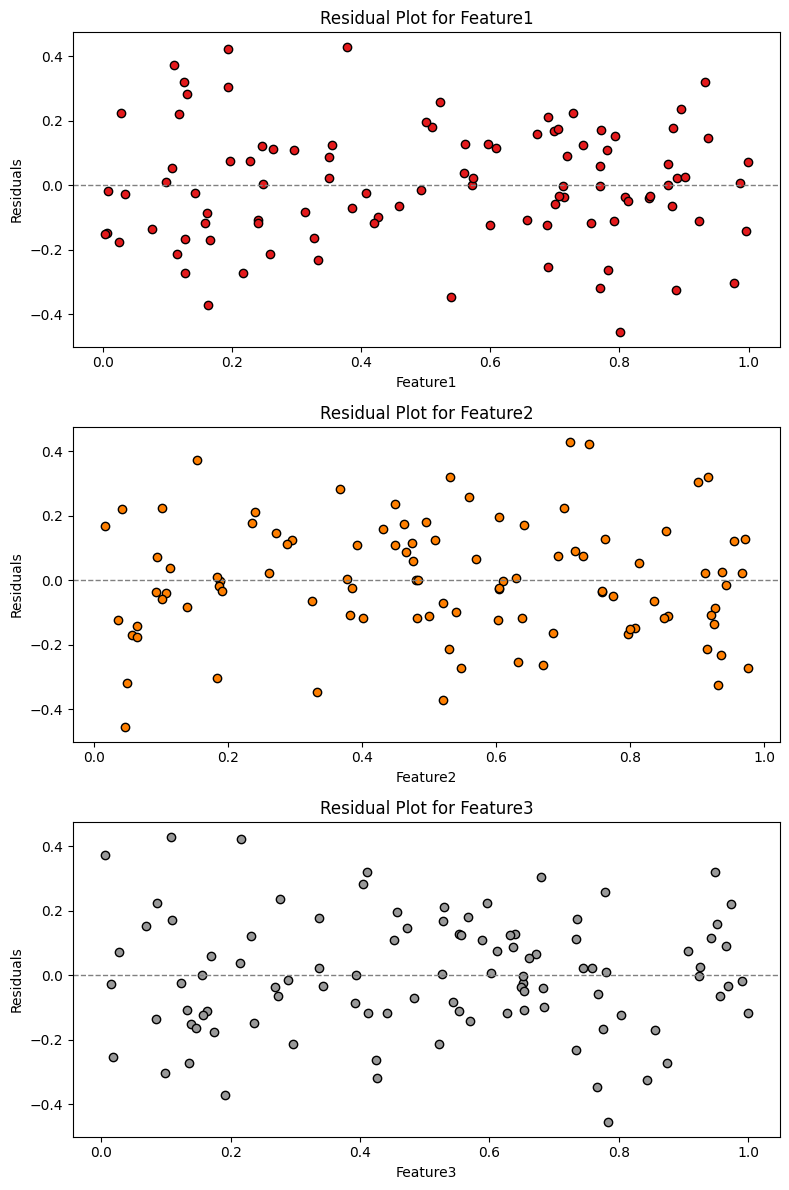

Residual plot generation completed.


In [29]:
# Main script execution
if __name__ == "__main__":
    main()
    